# **최소제곱법으로 회귀선 구하기**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

In [ ]:
#Mean Squared Error

a = sum( [ ( y -y_bar) * ( x - x_bar) for y, x in list(zip(Y, X)) ] )
a /= sum( [ (x- x_bar) **2 for x in X ])
b = y_bar - a * x_bar
print ('a:', a, 'b:', b )

a: -0.355834147915461 b: 15.669317743971302


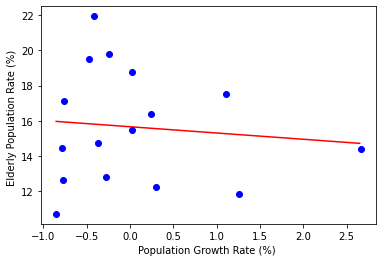

In [ ]:
#그래프

line_x = np.arange ( min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot( line_x, line_y, 'r-')

plt.plot (X, Y, 'bo')
plt.xlabel ('Population Growth Rate (%) ')
plt.ylabel ('Elderly Population Rate (%) ')
plt.show()

# **텐서플로우로 1차 회귀선**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable ( random.random())
b = tf.Variable ( random.random())

99 a: -0.35566637 b: 15.669381 loss: 9.780804
199 a: -0.35583532 b: 15.669319 loss: 9.780804
299 a: -0.35583434 b: 15.669318 loss: 9.780804
399 a: -0.35583353 b: 15.669319 loss: 9.780804
499 a: -0.35583404 b: 15.669317 loss: 9.780804
599 a: -0.3558346 b: 15.669318 loss: 9.780804
699 a: -0.35583442 b: 15.669318 loss: 9.780804
799 a: -0.3558343 b: 15.669318 loss: 9.780804
899 a: -0.35583365 b: 15.669318 loss: 9.780804
999 a: -0.35583487 b: 15.669318 loss: 9.780804


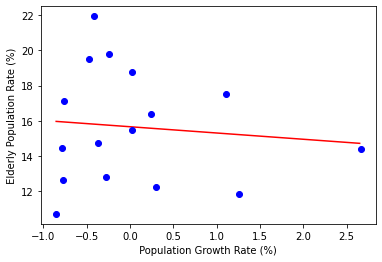

In [ ]:
# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X +b
    loss = tf.reduce_mean( (Y - y_pred) **2)
    return loss

optimizer = tf.keras.optimizers.Adam (learning_rate= 0.07)
for i in range(1000):
    optimizer.minimize (compute_loss , var_list= [ a, b])

    if i % 100 ==99:
        print ( i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange (min (X), max(X), 0.01)
line_y = a* line_x + b

plt.plot (line_x, line_y, 'r-')
plt.plot ( X, Y, 'bo')
plt.xlabel(' Population Growth Rate (%) ')
plt.ylabel(' Elderly Population Rate (%) ')
plt.show()

# **다항 회귀 (Polynomial Regression)**

2차

99 a: 4.102835 b: -5.9958777 c: 6.394003 loss: 69.43858
199 a: 2.8245277 b: -4.6098123 c: 10.237176 loss: 31.970045
299 a: 1.2864792 b: -2.3055024 c: 12.903726 loss: 16.150219
399 a: 0.32235482 b: -0.85626227 c: 14.5659895 loss: 10.996195
499 a: -0.19063047 b: -0.085554555 c: 15.45233 loss: 9.73004
599 a: -0.4261005 b: 0.26818347 c: 15.859338 loss: 9.493696
699 a: -0.5196596 b: 0.40873212 c: 16.021065 loss: 9.460072
799 a: -0.5518843 b: 0.45714107 c: 16.076765 loss: 9.45643
899 a: -0.56149364 b: 0.4715771 c: 16.093376 loss: 9.45613
999 a: -0.56396645 b: 0.47529125 c: 16.097652 loss: 9.456112


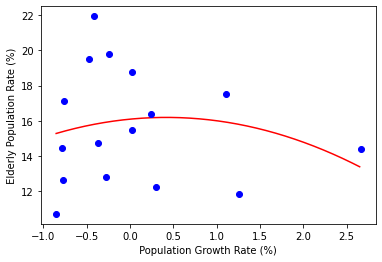

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a , b, c 를 랜덤한 값으로 초기화합니다.
a = tf.Variable ( random.random())
b = tf.Variable ( random.random())
c = tf.Variable ( random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a *X*X + b *X + c
    loss = tf.reduce_mean( (Y - y_pred) **2)
    return loss

optimizer = tf.keras.optimizers.Adam (learning_rate= 0.07)
for i in range(1000):
    optimizer.minimize (compute_loss , var_list= [ a, b, c])

    if i % 100 ==99:
        print ( i, 'a:', a.numpy(), 'b:', b.numpy(),  'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange (min (X), max(X), 0.01)
line_y = a* line_x* line_x + b* line_x + c

plt.plot (line_x, line_y, 'r-')
plt.plot ( X, Y, 'bo')
plt.xlabel(' Population Growth Rate (%) ')
plt.ylabel(' Elderly Population Rate (%) ')
plt.show()

3차

99 a: -1.0729685 b: 5.5504184 c: -3.8970642 d: 6.8501425 loss: 58.20023
199 a: -1.8579035 b: 6.378837 c: -2.1419373 d: 10.324395 loss: 28.404785
299 a: -1.5213715 b: 4.660021 c: -0.8706109 d: 12.410437 loss: 18.7195
399 a: -0.79125154 b: 2.3863606 c: -0.5406544 d: 13.855227 loss: 13.432836
499 a: -0.10665259 b: 0.38828743 c: -0.457752 d: 14.934873 loss: 10.488783
599 a: 0.42119592 b: -1.1352955 c: -0.42221949 d: 15.731204 loss: 9.026405
699 a: 0.79326624 b: -2.2072973 c: -0.40033716 d: 16.288134 loss: 8.3816595
799 a: 1.0383619 b: -2.9132116 c: -0.38631564 d: 16.654387 loss: 8.128845
899 a: 1.1899091 b: -3.3496473 c: -0.377711 d: 16.88073 loss: 8.0406475
999 a: 1.277936 b: -3.6031454 c: -0.37272668 d: 17.012182 loss: 8.013295


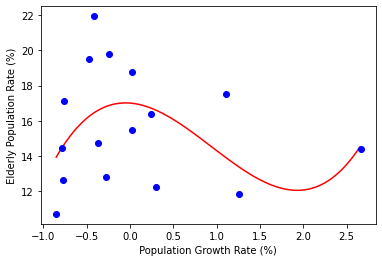

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a , b, c, d 를 랜덤한 값으로 초기화합니다.
a = tf.Variable ( random.random())
b = tf.Variable ( random.random())
c = tf.Variable ( random.random())
d = tf.Variable ( random.random())


# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a *X*X*X + b *X*X + c *X + d
    loss = tf.reduce_mean( (Y - y_pred) **2)
    return loss

optimizer = tf.keras.optimizers.Adam (learning_rate= 0.07)
for i in range(1000):
    optimizer.minimize (compute_loss , var_list= [ a, b, c, d])

    if i % 100 ==99:
        print ( i, 'a:', a.numpy(), 'b:', b.numpy(),  'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange (min (X), max(X), 0.01)
line_y = a* line_x* line_x* line_x + b* line_x* line_x + c* line_x +d

plt.plot (line_x, line_y, 'r-')
plt.plot ( X, Y, 'bo')
plt.xlabel(' Population Growth Rate (%) ')
plt.ylabel(' Elderly Population Rate (%) ')
plt.show()

# **딥러닝 네트워크를 이용한 회귀**

In [ ]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential( [
                              tf.keras.layers.Dense(units=6, activation='tanh', input_shape= (1,) ),
                              tf.keras.layers.Dense(units=1)                              
                              ] )
model.compile (optimizer=tf.keras.optimizers.SGD (learning_rate=0.1), loss= 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Traning
model.fit (X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 254.8482
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 117.6793
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 10.4417
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6304
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5456
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5240
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5062
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4868
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4649
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4400


In [ ]:
model.predict(X)

array([[16.031815],
       [15.471788],
       [15.605209],
       [16.00345 ],
       [15.72187 ],
       [16.031544],
       [15.903126],
       [15.758137],
       [15.482702],
       [15.82807 ],
       [15.392204],
       [15.801382],
       [15.887379],
       [16.00104 ],
       [15.493504],
       [13.788971]], dtype=float32)

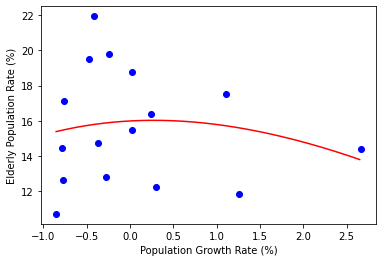

In [ ]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

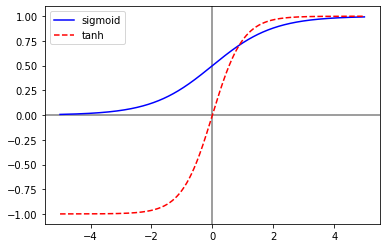

In [ ]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# **Boston Housing Dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print (len(train_X), len(test_X))

print (train_X [100])
print (train_Y [100])

57344/57026 [==============================] - 0s 0us/step
404 102
[6.1290e-02 2.0000e+01 3.3300e+00 1.0000e+00 4.4290e-01 7.6450e+00
 4.9700e+01 5.2119e+00 5.0000e+00 2.1600e+02 1.4900e+01 3.7707e+02
 3.0100e+00]
46.0


데이터 전처리 (정규화)

In [19]:
print (train_X [0])
print (train_Y [0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [20]:
x_mean = train_X.mean( axis=0)
x_std = train_X.std( axis=0)
train_X -= x_mean
train_X /=x_std
test_X -= x_mean
test_X /=x_std

y_mean = train_Y.mean (axis=0)
y_std = train_Y.std (axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [21]:
#회귀 모델
model = tf.keras.Sequential ([
        tf.keras.layers.Dense(units=52, activation='relu', input_shape= (13,)),
        tf.keras.layers.Dense(units=39, activation='relu'),
        tf.keras.layers.Dense(units=26, activation='relu'),
        tf.keras.layers.Dense(units=1),
])

model.compile (optimizer= tf.keras.optimizers.Adam (lr=0.07), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


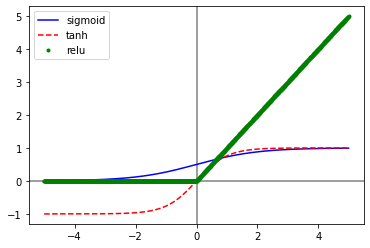

In [22]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x =[ sigmoid(z) for z in x ]
tanh_x = [ math.tanh(z) for z in x ]
relu = [0 if z <0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [23]:
history = model.fit ( train_X, train_Y, epochs= 25, batch_size= 32, validation_split= 0.25)

Epoch 1/25
10/10 [==============================] - 0s 41ms/step - loss: 5.5550 - val_loss: 1.1228
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6639 - val_loss: 0.8761
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4440 - val_loss: 0.5226
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.5576
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2867 - val_loss: 0.4051
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2599 - val_loss: 0.2662
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1671 - val_loss: 0.2497
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1622 - val_loss: 0.2112
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1417 - val_loss: 0.2733
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1593 - val_loss: 0.1923
Epoch 11/25
10/10 

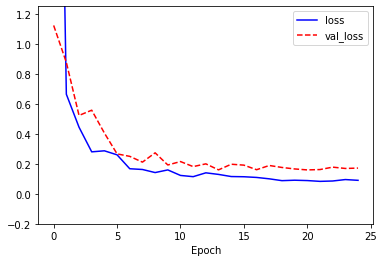

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label= 'loss ')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.xlabel('Epoch')
plt.ylim ( -0.2, 1.25)
plt.legend()
plt.show()

In [28]:
model.evaluate (test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.3337


0.3337041735649109

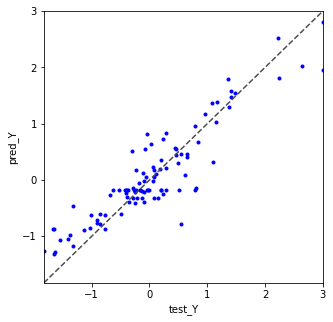

In [29]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")

plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

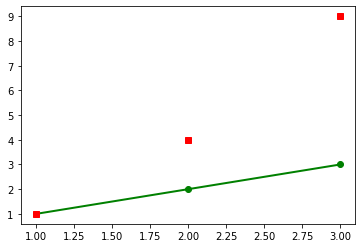

In [32]:
plt.plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=2)  
plt.plot([1, 2, 3], [1, 4, 9], 'rs', label='line 2')  